# Jonathan Halverson
# Keeping it Fresh: Predict Restaurant Inspections
## Part 5: Yelp tip data

In this notebook we explore the tip data. Each tip is given along with the date it was written and the user id.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [7]:
from helper_methods import read_json
df_tip = read_json('data/yelp_academic_dataset_tip.json')
df_tip.head()

,business_id,date,likes,text,type,user_id
0,CgdK8DiyX9Y4kTKEPi_qgA,2011-02-09,0,Great soup & sandwiches!,tip,U54NM7zbsMRPwECY21ialQ
1,CgdK8DiyX9Y4kTKEPi_qgA,2010-10-04,0,Surprisingly good panini. I'd come here again!,tip,U54NM7zbsMRPwECY21ialQ
2,SAnMTC1rm-PhP8DQC4zeyg,2012-02-09,0,They do great lunch sandwiches. Real fresh tu...,tip,ZCL6LhChkD-9X7xgnOomjA
3,75dtVyDb8Sfwb7dR0cBvdg,2012-07-28,0,Saturday brunch!,tip,yziCot_SVSNUh6905qgb2A
4,75dtVyDb8Sfwb7dR0cBvdg,2012-10-08,0,Breakfast for 2 less than $20 including tip.,tip,6khNhFYFO3KSnRAM_9YdQw


In [3]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24424 entries, 0 to 24423
Data columns (total 6 columns):
business_id    24424 non-null object
date           24424 non-null datetime64[ns]
likes          24424 non-null int64
text           24424 non-null object
type           24424 non-null object
user_id        24424 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.3+ MB


In [29]:
df_tip.describe()

,likes,num_characters
count,24424.000000,24424.000000
mean,0.005855,56.819399
std,0.082484,51.165754
min,0.000000,1.000000
25%,0.000000,24.000000
50%,0.000000,43.000000
75%,0.000000,73.000000
max,4.000000,500.000000


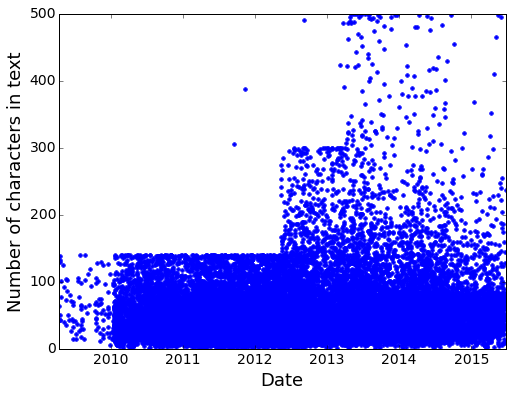

In [9]:
df_tip['num_characters'] = df_tip['text'].apply(len)
plt.plot(df_tip['date'], df_tip['num_characters'], '.')
plt.xlabel('Date')
plt.ylabel('Number of characters in text')

The figure above suggests that Yelp increased their character limit twice. However, there are three points which seem to violate the early limits.

In [22]:
most_chars = df_tip.sort_values('num_characters', ascending=False)
most_chars.loc[most_chars.index[0], 'text']

u"Tasteless/stale macarons; bakery products were mistakes. Lamb shank=mostly fat&came with a price tag to match fillet mignon at Morton's. Atmosphere was WORST I've ever experienced (was placed at a seat where I needed to walk behind a counter next to the kitchen to get out &staff kept coming out and hitting me with random plates)\nBottom line: if you're going to have such upscale dish prices, attempt to make your restaurant's atmosphere resemble at least a hole in the wall& have food with quality."

In [23]:
most_chars.loc[most_chars.index[1], 'text']

u'I went to the Medieval Manor last night for the first time in 7 years.  They far exceeded my high expectations!  The cast is welcoming, funny, and engaging. You can tell that the love what they do.\n\nThe food is fantastic, with chicken, ribs, soup and salad that alone is worth the price of admission.  There is beer, wine and non-alcoholic mead that was delicious and plentiful.\n\nMy birthday is next month and I am planning on spending it at the Manor, and looking forward to another great night out.'

In [24]:
most_chars.loc[most_chars.index[2], 'text']

u"This so-called Shanghai-style restaurant is opened and operated by Shanghaiese. But, the dishes are not anywhere close. The dishes are not authentic at all. Trust me, I have been living in Shanghai for 7 years and marry to a Shanghai native. The toast fish is made of a wrong kind of fish and is cut wrongly. The buns are made of wrong flour and don't have soup in it. The pork with tofu wrap is poorly cooked and not even soft enough. The corn pie doesn't have green peas and carrot, etc. Thumb down"

There is clearly useful information in the tips or at least in the long tips. Many of the complaints don't relate to health inspection violations.

One can imagine using the user data to either include or exclude the tip. If the person has fewer than some number of reviews or tips then they might be excluded. Or if all their tips are strongly positive or negative.

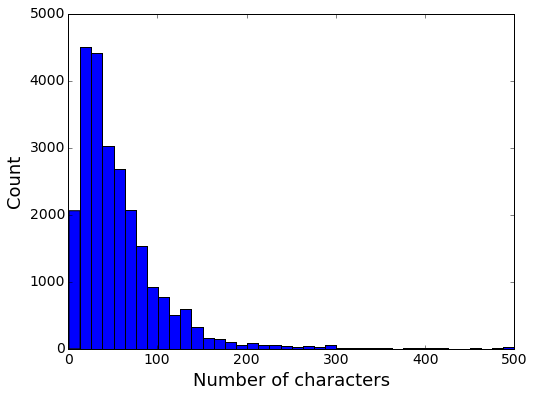

In [28]:
plt.hist(df_tip.num_characters, bins=40)
plt.xlabel('Number of characters')
plt.ylabel('Count')

We see from the histogram above that most tips are short with the mean number of characters being 56.8.